In [1]:
library(astsa)

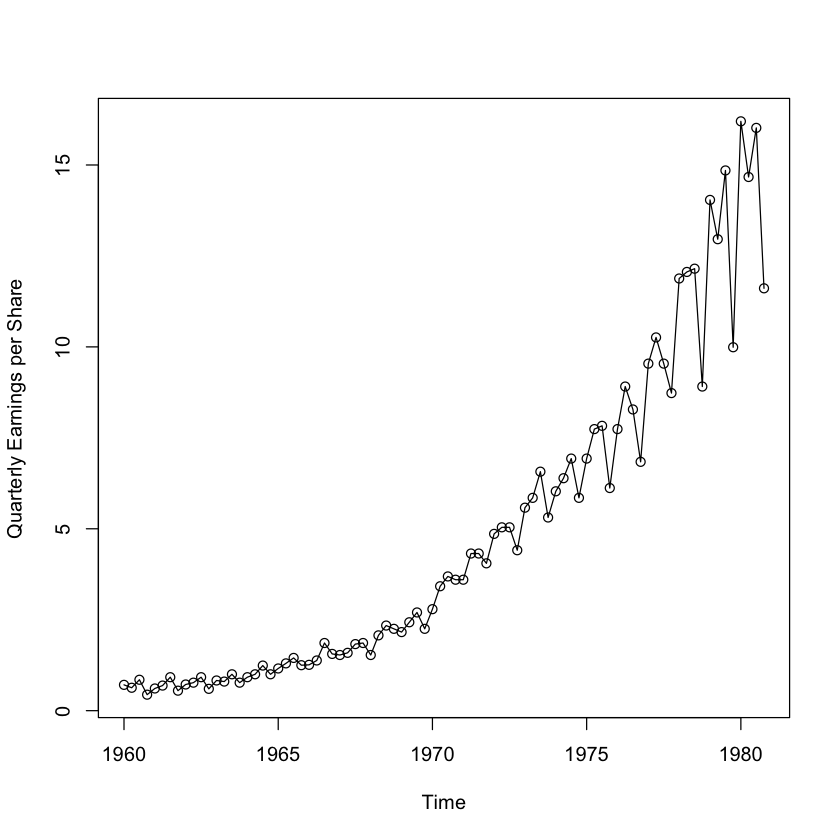

In [2]:
plot(jj, type='o', ylab="Quarterly Earnings per Share")

In [3]:
decompose(jj)

$x
          Qtr1      Qtr2      Qtr3      Qtr4
1960  0.710000  0.630000  0.850000  0.440000
1961  0.610000  0.690000  0.920000  0.550000
1962  0.720000  0.770000  0.920000  0.600000
1963  0.830000  0.800000  1.000000  0.770000
1964  0.920000  1.000000  1.240000  1.000000
1965  1.160000  1.300000  1.450000  1.250000
1966  1.260000  1.380000  1.860000  1.560000
1967  1.530000  1.590000  1.830000  1.860000
1968  1.530000  2.070000  2.340000  2.250000
1969  2.160000  2.430000  2.700000  2.250000
1970  2.790000  3.420000  3.690000  3.600000
1971  3.600000  4.320000  4.320000  4.050000
1972  4.860000  5.040000  5.040000  4.410000
1973  5.580000  5.850000  6.570000  5.310000
1974  6.030000  6.390000  6.930000  5.850000
1975  6.930000  7.740000  7.830000  6.120000
1976  7.740000  8.910000  8.280000  6.840000
1977  9.540000 10.260000  9.540000  8.729999
1978 11.880000 12.060000 12.150000  8.910000
1979 14.040000 12.960000 14.850000  9.990000
1980 16.200000 14.670000 16.020000 11.610000

$seaso

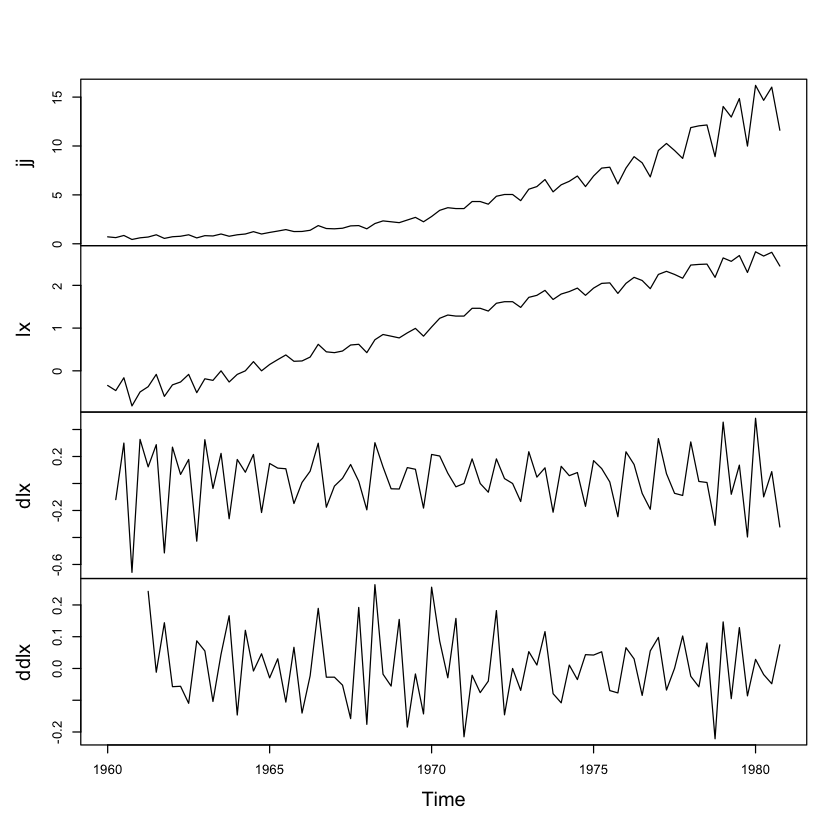

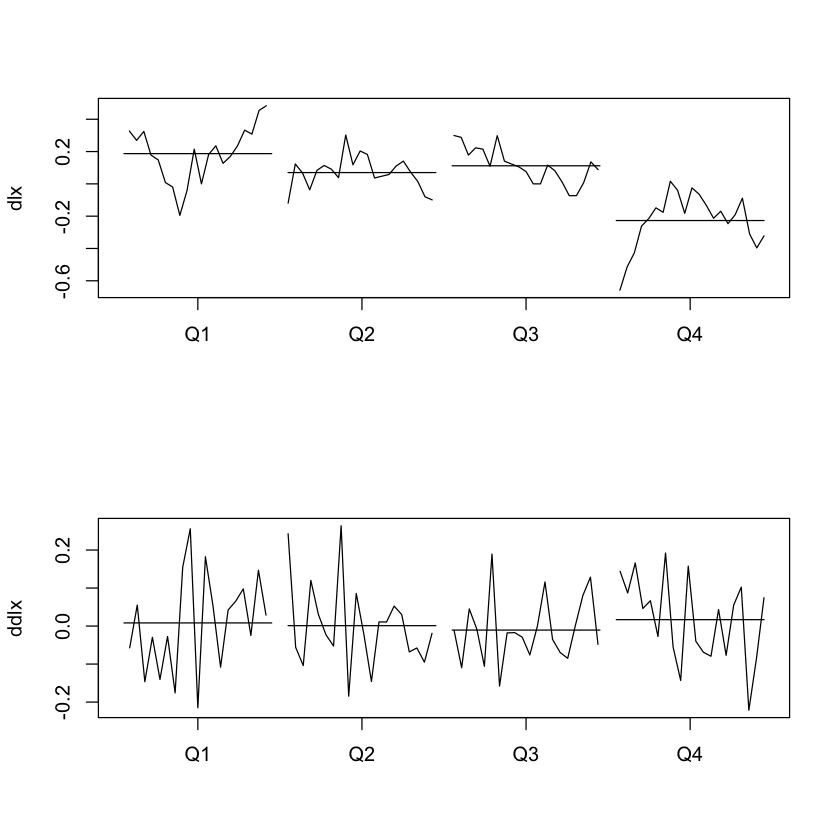

In [6]:
lx = log(jj)
dlx = diff(lx)
ddlx = diff(dlx, 4)
plot.ts(cbind(jj,lx, dlx, ddlx), main="")
par(mfrow=c(2,1))
monthplot(dlx); monthplot(ddlx)

ACF,PACF
-0.44,-0.44
0.15,-0.05
-0.09,-0.05
-0.21,-0.33
0.11,-0.16
-0.13,-0.19
0.27,0.13
-0.07,0.08
-0.07,-0.14
0.12,0.04


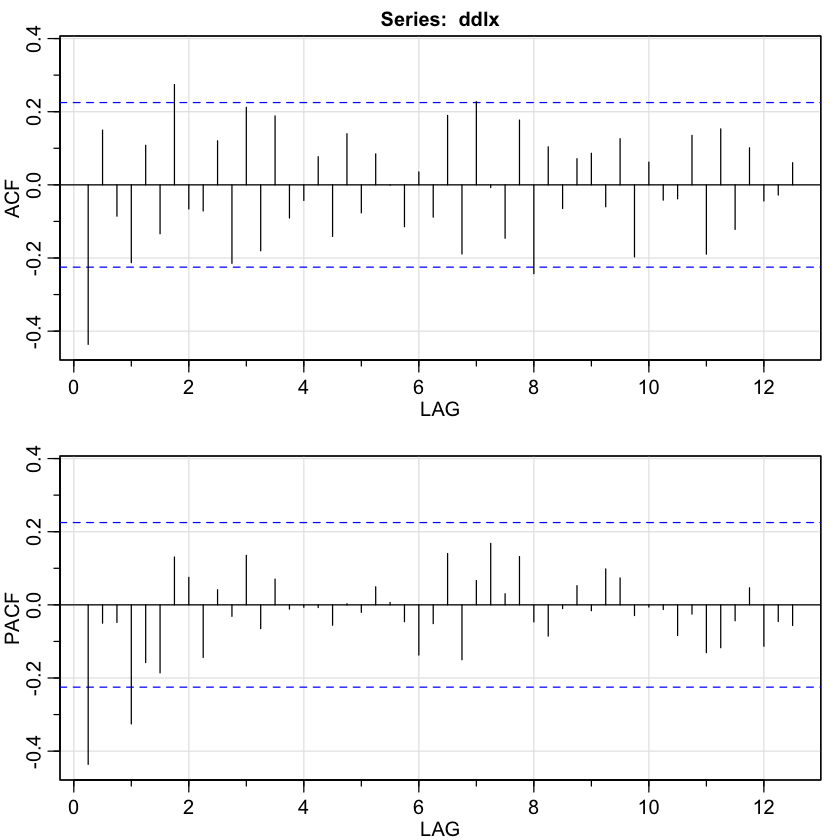

In [7]:
acf2(ddlx, 50)

it appears that the acf is cutting off a lag 2s (s = 4) and pacf is tailing off at lags 1s, 2s..., these results imply that SMA(1), p=0, Q=1, s=4

for the non seasonal component, we can see that the acf and pacf at the lower lags appear to tail off. So we have ARMA(1,1) with p=q=1

initial  value -2.242928 
iter   2 value -2.375879
iter   3 value -2.430447
iter   4 value -2.438072
iter   5 value -2.456870
iter   6 value -2.465488
iter   7 value -2.465633
iter   8 value -2.465668
iter   9 value -2.465672
iter  10 value -2.465674
iter  11 value -2.465677
iter  12 value -2.465678
iter  13 value -2.465679
iter  14 value -2.465679
iter  14 value -2.465679
iter  14 value -2.465679
final  value -2.465679 
converged
initial  value -2.402405 
iter   2 value -2.406189
iter   3 value -2.408428
iter   4 value -2.410415
iter   5 value -2.411127
iter   6 value -2.411153
iter   7 value -2.411157
iter   8 value -2.411158
iter   8 value -2.411158
final  value -2.411158 
converged


$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), include.mean = !no.constant, transform.pars = trans, fixed = fixed, 
    optim.control = list(trace = trc, REPORT = 1, reltol = tol))

Coefficients:
         ar1      ma1     sma1
      0.0275  -0.6990  -0.3072
s.e.  0.2066   0.1646   0.1219

sigma^2 estimated as 0.007929:  log likelihood = 78.39,  aic = -148.77

$degrees_of_freedom
[1] 76

$ttable
     Estimate     SE t.value p.value
ar1    0.0275 0.2066  0.1331  0.8944
ma1   -0.6990 0.1646 -4.2476  0.0001
sma1  -0.3072 0.1219 -2.5203  0.0138

$AIC
[1] -1.814276

$AICc
[1] -1.810523

$BIC
[1] -1.698693


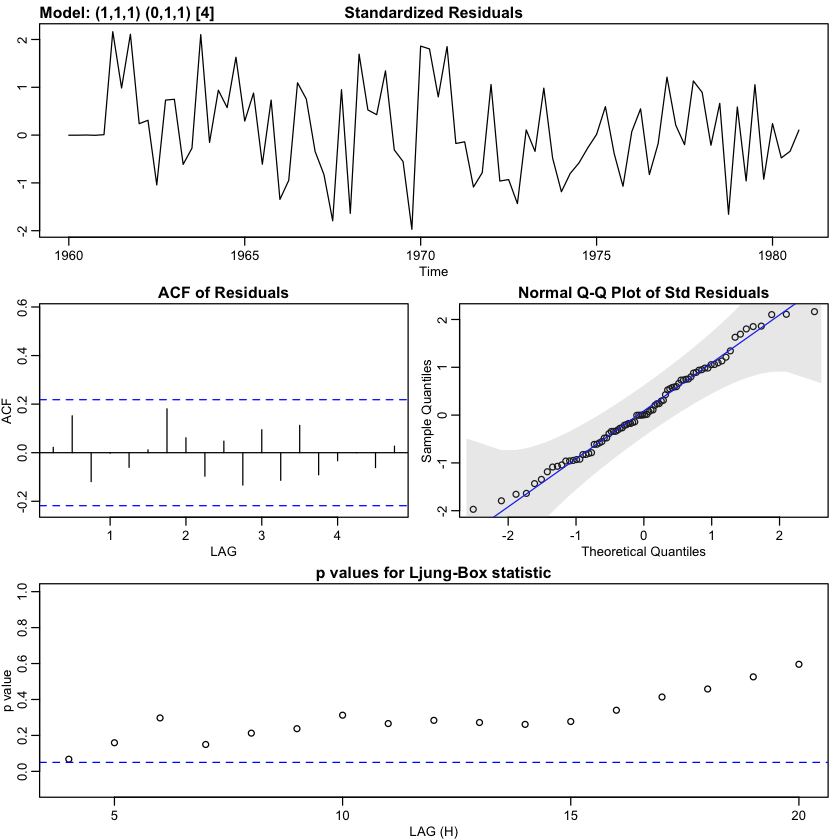

In [8]:
sarima(lx, 1, 1, 1, 0, 1,1,4)


since the p value of the ar parameter doesn't look significant, we can drop the seaonsal component. So now we try ARIMA(0,1,1) x (0,1,1) and ARIMA(1,1,0) x (0,1,1)


initial  value -2.242928 
iter   2 value -2.399148
iter   3 value -2.402522
iter   4 value -2.403053
iter   5 value -2.403056
iter   5 value -2.403056
iter   5 value -2.403056
final  value -2.403056 
converged
initial  value -2.380113 
iter   2 value -2.381008
iter   3 value -2.381084
iter   4 value -2.381084
iter   4 value -2.381084
iter   4 value -2.381084
final  value -2.381084 
converged


$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), include.mean = !no.constant, transform.pars = trans, fixed = fixed, 
    optim.control = list(trace = trc, REPORT = 1, reltol = tol))

Coefficients:
          ar1     sma1
      -0.5078  -0.3243
s.e.   0.1009   0.1046

sigma^2 estimated as 0.008472:  log likelihood = 76.01,  aic = -146.02

$degrees_of_freedom
[1] 77

$ttable
     Estimate     SE t.value p.value
ar1   -0.5078 0.1009 -5.0332  0.0000
sma1  -0.3243 0.1046 -3.1011  0.0027

$AIC
[1] -1.78072

$AICc
[1] -1.778868

$BIC
[1] -1.694033


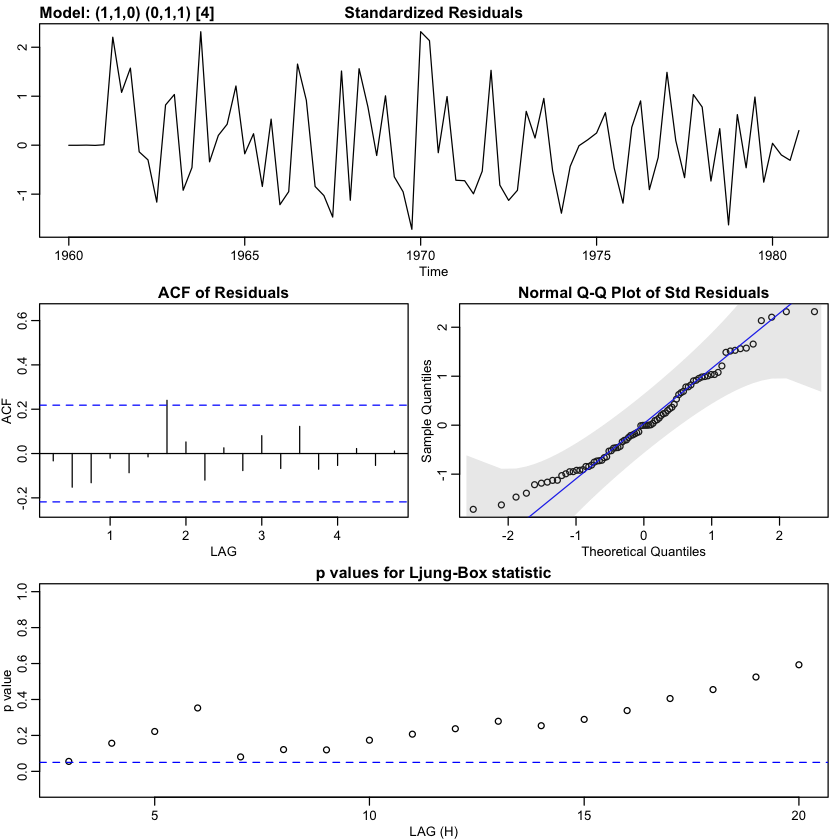

In [9]:
sarima(lx,1,1,0,0,1,1,4)

Here we find that the p-value of the ar component is significant, so we use this model to forcaset the next 4 quarters

ERROR while rich displaying an object: Error in arr_partition(a, rows, cols): rows >= 2L is not TRUE

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_html.list(obj)
9. r

$pred
         Qtr1     Qtr2     Qtr3     Qtr4
1981 2.905343 2.823891 2.912148 2.581085

$se
           Qtr1       Qtr2       Qtr3       Qtr4
1981 0.08905414 0.09347899 0.09770366 0.10175307


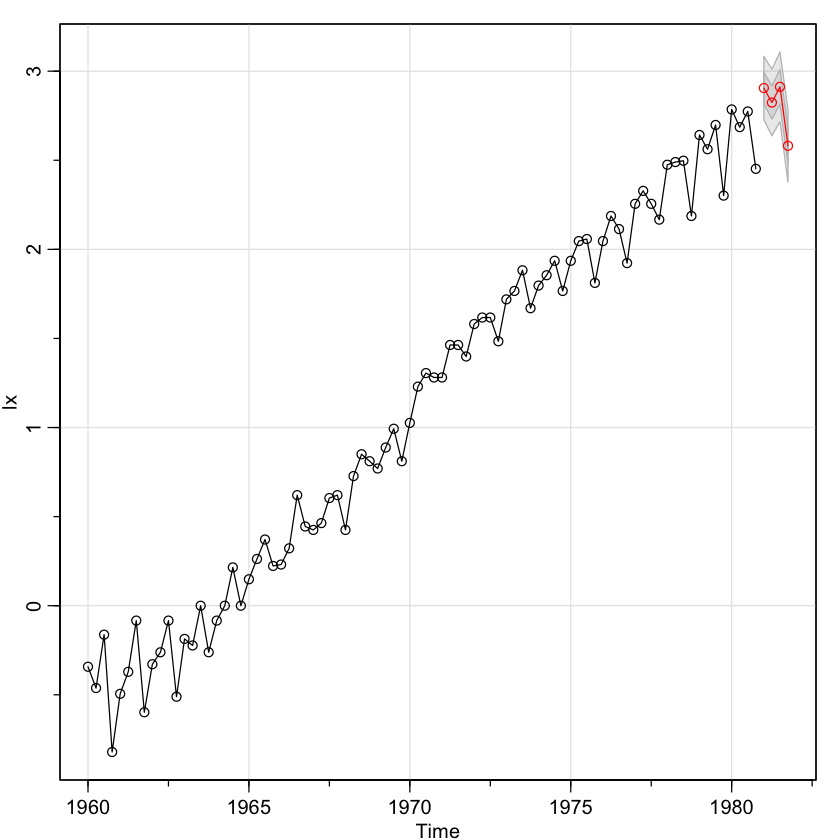

In [12]:
sarima.for(lx,4,0,1,1,0,1,1,4)

Very COOL!

NOTE : I used the code and explanations from the air passenger example in the textbook.  I left variable names the same because I didn't really see it necessary to change them.